In [483]:
import pandas as pd 
import numpy as np
import re

In [485]:

pd.set_option('display.max_colwidth' ,None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [487]:
import os

file_path = r"PycharmProjects/Real_Estate_Price_Predictor/Real-Estate-Price-Prediction-Recommender-System-/Data/gurgoan_properties_cleaned_v1.csv"
print("Exists:", os.path.exists(file_path))


Exists: False


In [489]:
import os
os.getcwd()


'C:\\Users\\rajni\\PycharmProjects\\Real_Estate_Price_Predictor\\Real-Estate-Price-Prediction-Recommender-System-\\Data_Cleaning_Code'

In [491]:
df =pd.read_csv('../Data/gurgoan_properties_cleaned_v1.csv')

In [493]:
df.shape

(3783, 17)

In [495]:
df.tail()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
3778,house,Independent,sector 57,4.75,28787.0,1650.0,Plot area 1600(148.64 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1650 sq.ft. (153.29 sq.m.),3,3,3,Store Room,2.0,North-West,5 to 10 Year Old,"['Radhakrishna Shani Mandir', 'Sanatan Dharm Mandir', 'State bank ATM', 'Icici bank ATM', 'Icici bank ATM', 'Citi bank ATM', 'Anand Hospital Gurgaon', 'Kriti Hospital', 'Surgicare Hospital Gurgaon', 'pracksht hospital', 'Vatsalya Clinic', 'Arunodaya Deseret Eye Hospital', 'Arihant Hospital', 'HUDA Office Complex', 'Wembley estate club', 'Medisca', 'Pernod Ricard Charitable Dispensary', 'Unitech', 'Heera Fuel Station', 'HCG CNG Station', 'Hdfc bank and atm', 'Hdfc bank', 'Kotak mahindra bank', 'Indusind bank', 'State bank of india', 'Axis bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank & atm', '222', 'Pizza Hut', 'Madison and Pike', 'Wat-a-Burger', 'Burger Singh', 'Bikanerwala', 'Naivedyam Restaurant', 'Gurugram University', 'IILM', 'Iilm University', 'Kamla International', 'Amity Global School', 'St. Angels Sr', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology', 'Manav Rachna Swimming Pool']","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '11 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting']"
3779,house,dlf city phase 1,sector 26,5.50,30556.0,1800.0,Plot area 200(167.23 sq.m.),4,4,3,"Pooja Room,Study Room,Servant Room",2.0,North-East,5 to 10 Year Old,"['Dlf phase 1 metro station', 'Sikandarpur metro station', 'Sikanderpur metro station', 'Sikandarpur rmrg metro station', 'Mg road metro station', 'Hanuman Mandir', 'Axis bank ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Rbs ATM', 'Divine Look Clinic Centre 1', 'Lord Krishna Hospital', 'Sidhesh Hospital Gurgaon', 'Sitaram Bhartia', 'Sikka Maternity And Surgical Center', 'Uma Sanjeevani Health Centre And Hospital', 'Marwah Clinic', 'Surgi Center Clinic', 'Religare Wellness', '98.4', 'Guardian', 'Chikitsa', 'Guardian Pharmacy', 'Emaar Business Park', 'Axis bank', 'Hdfc bank', 'Lord krishna bank', 'Indusind bank', 'Abn amro bank', 'Kotak mahindra bank', 'Hsbc bank', 'Axis bank', 'PVR Cinames', 'DT Cinemas', 'PVR Metropolitan', 'Food Court', 'Nowhere Brewpub and cafe', 'Fat', 'Dighent cafe', 'Blue Tokai Coffee Roasters', 'Starbucks', 'Belgian Waffle', 'Drunken Monkey', 'CCD', 'NutrioBox Gurugram', 'Barbecue Grill', 'Pan Bangkok', 'Bahrisons library']","['10 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Park', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting']"
3780,house,dlf city plots phase 2,sector 25,4.25,31481.0,1350.0,Plot area 150(125.42 sq.m.),3,2,3,Study Room,2.0,North,10+ Year Old,"['Sahara Mall', 'Delhi Public School', 'Privat Hospital']",NaN,"['High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']"
3781,house,d

In [497]:
df.duplicated().sum()

120

In [499]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,4.0,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pearl Dental Clinic', 'Taneja Hospital', 'Dr. Ashok Jain', 'Dr. Madan Clinic', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Dev Man Kathuria Clinic', 'Aryan Hospital', 'Kr Dental Hub', 'Swastik Maternity and Medical Centre', 'Satyam Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Esic Hospital Gurugram', 'Gurgaon Eye Centre', 'Bindal Clinic', 'Shiv Mahima Patient Care Bureau', 'Shree Krishna Hospital Gurgaon', 'M.S Hospital', 'My Care Clinic', 'Ankur Clinic and Maternity Home', 'Triveni Hospital Gurgaon', 'Shri Gobind Hospital', 'Navjeevan Hospital and Maternity Centre', 'Lal Superspeciality Hospital', 'Sparsh Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhatnagar Maternity and Nursing Home', 'Tirath Ram Hospitals Pvt Ltd', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Ajay S. Gupta Clinic', 'Kidney Clinic', 'Mangalam Hospital and Heart Centre Gurgaon', 'Sethi Hospital Gurgaon', 'Shubham Hospital Gurgaon', 'Kharbanda Maternity and Nursing Home', 'Gupta Hospital Gurgaon', 'Dentecare - Multispeciality Dental Clinic', 'State bank of india', 'Hdfc bank', 'Kotak bank', 'Indian bank', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College']","['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Water Storage', 'Visitor Parking']"


# Working with  the first column i.e areaWithType

In [502]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
1495,1.28,1215.1,Super Built up area 1215(112.88 sq.m.)
3611,4.35,5481.0,Plot area 5480(509.11 sq.m.)
3366,0.75,745.0,Plot area 745(69.21 sq.m.)Built Up area: 745 sq.ft. (69.21 sq.m.)
2912,1.50,1400.0,Carpet area: 1400 (130.06 sq.m.)
3196,1.10,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area: 900 sq.ft. (83.61 sq.m.)


In [504]:
# the issue with the column is that here in few columns we have all the 3 area but in most of the columns we have either 
# one of the area so we need to seprate it and then handle the areWithType column 


In [506]:
# The function to extract the Super Built up area 
def super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)',text)
    if match:
        return float(match.group(1))
    return None

In [508]:
# # The function to extract the Built up area 
# def built_up_area(text):
#     match = re.search(r'Built Up area (\d+\.?\d*)',text)
#     if match:
#         return float(match.group(1))
#     return None

In [510]:
# The common function to extract the area
def get_area(text,area_type):
    match =re.search(area_type + r'\s*:\s*(\d+\.?\d*)' , text)
    if match:
        return float(match.group(1))
    return None


In [512]:
# Problem here the areas are in the sqft , sq.m and sq yard so we want all in the sqft 


In [514]:
# The function to check if the area is provided in sq.m and converts it to sqft 
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value),text)
    if match:
        sq_m_value =float(match.group(1))
        return sq_m_value *10.7639
    return area_value
    

In [516]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features'],
      dtype='object')

In [518]:
# Extract the Super Built Up Area and convert it into the sqft 
df['super_built_up_area'] =df['areaWithType'].apply(super_built_up_area)
df['super_built_up_area'] =df.apply(lambda x: convert_to_sqft(x['areaWithType'],x['super_built_up_area']),axis =1)

# Extract the built-up area and convert it into sqft 
df['built_up_area'] =df['areaWithType'].apply(lambda x: get_area(x,'Built Up area'))
df['built_up_area'] =df.apply(lambda x:convert_to_sqft(x['areaWithType'] ,x['built_up_area']),axis =1)

# Extract the Carpet Area and Convert it into sqft 
df['carpet_area'] =df['areaWithType'].apply(lambda x: get_area(x,'Carpet area'))
df['carpet_area'] =df.apply(lambda x :convert_to_sqft(x['areaWithType'] ,x['carpet_area']),axis =1)
                                        

In [519]:
df[['price','property_type','area', 'areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
382,1.40,flat,1349.0,Super Built up area 1349(125.33 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),1349.0,NaN,1000.0
895,2.60,flat,2273.1,Super Built up area 2273(211.17 sq.m.)Carpet area: 1340 sq.ft. (124.49 sq.m.),2273.0,NaN,1340.0
127,0.80,flat,610.0,Built Up area: 610 (56.67 sq.m.),NaN,610.0,NaN
1500,1.45,flat,2150.1,Super Built up area 2150(199.74 sq.m.)Built Up area: 1797 sq.ft. (166.95 sq.m.)Carpet area: 1660 sq.ft. (154.22 sq.m.),2150.0,1797.0,1660.0
3512,10.45,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN


In [523]:
df['carpet_area'].isnull().sum()

1842

In [525]:
df.duplicated().sum()

120

In [527]:
# We want to extract the null values from either super_built_up_area , built_up_area & Carpet_area 

In [529]:
df.tail()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
3778,house,Independent,sector 57,4.75,28787.0,1650.0,Plot area 1600(148.64 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1650 sq.ft. (153.29 sq.m.),3,3,3,Store Room,2.0,North-West,5 to 10 Year Old,"['Radhakrishna Shani Mandir', 'Sanatan Dharm Mandir', 'State bank ATM', 'Icici bank ATM', 'Icici bank ATM', 'Citi bank ATM', 'Anand Hospital Gurgaon', 'Kriti Hospital', 'Surgicare Hospital Gurgaon', 'pracksht hospital', 'Vatsalya Clinic', 'Arunodaya Deseret Eye Hospital', 'Arihant Hospital', 'HUDA Office Complex', 'Wembley estate club', 'Medisca', 'Pernod Ricard Charitable Dispensary', 'Unitech', 'Heera Fuel Station', 'HCG CNG Station', 'Hdfc bank and atm', 'Hdfc bank', 'Kotak mahindra bank', 'Indusind bank', 'State bank of india', 'Axis bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank & atm', '222', 'Pizza Hut', 'Madison and Pike', 'Wat-a-Burger', 'Burger Singh', 'Bikanerwala', 'Naivedyam Restaurant', 'Gurugram University', 'IILM', 'Iilm University', 'Kamla International', 'Amity Global School', 'St. Angels Sr', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology', 'Manav Rachna Swimming Pool']","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '11 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting']",NaN,1700.0,1650.0
3779,house,dlf city phase 1,sector 26,5.50,30556.0,1800.0,Plot area 200(167.23 sq.m.),4,4,3,"Pooja Room,Study Room,Servant Room",2.0,North-East,5 to 10 Year Old,"['Dlf phase 1 metro station', 'Sikandarpur metro station', 'Sikanderpur metro station', 'Sikandarpur rmrg metro station', 'Mg road metro station', 'Hanuman Mandir', 'Axis bank ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Rbs ATM', 'Divine Look Clinic Centre 1', 'Lord Krishna Hospital', 'Sidhesh Hospital Gurgaon', 'Sitaram Bhartia', 'Sikka Maternity And Surgical Center', 'Uma Sanjeevani Health Centre And Hospital', 'Marwah Clinic', 'Surgi Center Clinic', 'Religare Wellness', '98.4', 'Guardian', 'Chikitsa', 'Guardian Pharmacy', 'Emaar Business Park', 'Axis bank', 'Hdfc bank', 'Lord krishna bank', 'Indusind bank', 'Abn amro bank', 'Kotak mahindra bank', 'Hsbc bank', 'Axis bank', 'PVR Cinames', 'DT Cinemas', 'PVR Metropolitan', 'Food Court', 'Nowhere Brewpub and cafe', 'Fat', 'Dighent cafe', 'Blue Tokai Coffee Roasters', 'Starbucks', 'Belgian Waffle', 'Drunken Monkey', 'CCD', 'NutrioBox Gurugram', 'Barbecue Grill', 'Pan Bangkok', 'Bahrisons library']","['10 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Park', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting']",NaN,NaN,NaN
3780,house,dlf city plots phase 2,sector 25,4.25,31481.0,1350.0,Plot area 150(125.42 sq.m.),3,2,3,Study Room,2.0,North,10+ Year Old,"['Sahara Mall', 'Delhi Public School', 'Privat Hospital']",NaN,"['High Ceiling Height', 'Maintenance Staff', 'Water Storage',

In [531]:
df[~((df['super_built_up_area'].isnull()) |(df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
380,1.56,flat,1929.0,Super Built up area 1929(179.21 sq.m.)Built Up area: 1580 sq.ft. (146.79 sq.m.)Carpet area: 1450 sq.ft. (134.71 sq.m.),1929.0,1580.0,1450.0
1871,1.35,flat,965.0,Super Built up area 1276(118.54 sq.m.)Built Up area: 1090 sq.ft. (101.26 sq.m.)Carpet area: 965 sq.ft. (89.65 sq.m.),1276.0,1090.0,965.0
751,2.70,flat,2305.1,Super Built up area 2305(214.14 sq.m.)Built Up area: 2000 sq.ft. (185.81 sq.m.)Carpet area: 1700 sq.ft. (157.94 sq.m.),2305.0,2000.0,1700.0
1018,0.99,flat,1815.2,Super Built up area 1815(168.62 sq.m.)Built Up area: 1400 sq.ft. (130.06 sq.m.)Carpet area: 1270 sq.ft. (117.99 sq.m.),1815.0,1400.0,1270.0
1499,1.50,flat,2150.2,Super Built up area 2150(199.74 sq.m.)Built Up area: 1797 sq.ft. (166.95 sq.m.)Carpet area: 1670 sq.ft. (155.15 sq.m.),2150.0,1797.0,1670.0


In [533]:
df['super_built_up_area'].isnull().sum()

1869

In [535]:

df[~((df['super_built_up_area'].isnull()) |(df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [537]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(666, 7)

In [539]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     1
price_per_sqft            1
area                      1
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                  845
agePossession             1
nearbyLocations         176
furnishDetails          977
features                629
super_built_up_area    1869
built_up_area          2601
carpet_area            1842
dtype: int64

In [541]:
all_nan_df =df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) &(df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [543]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2941,5.25,house,2610.0,Plot area 290(242.48 sq.m.),NaN,NaN,NaN
2942,2.10,house,549.0,Plot area 61(51 sq.m.),NaN,NaN,NaN
2943,5.00,house,1161.0,Plot area 129(107.86 sq.m.),NaN,NaN,NaN
2944,3.00,house,558.0,Plot area 62(51.84 sq.m.),NaN,NaN,NaN
2945,4.50,house,1152.0,Plot area 128(107.02 sq.m.),NaN,NaN,NaN
2946,12.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
2947,20.00,house,4091.0,Plot area 500(418.06 sq.m.),NaN,NaN,NaN
2948,10.85,house,2844.0,Plot area 316(264.22 sq.m.),NaN,NaN,NaN
2949,1.95,house,1935.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
2950,4.45,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN


In [545]:
all_nan_index =df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) &(df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [547]:
all_nan_index

Index([2941, 2942, 2943, 2944, 2945, 2946, 2947, 2948, 2949, 2950,
       ...
       3772, 3773, 3774, 3775, 3776, 3777, 3779, 3780, 3781, 3782],
      dtype='int64', length=533)

In [549]:
# Function to extract the Plot area 
def extract_plot_area(area_with_type):
    match =re.search(r'Plot area (\d+\.?\d*)',area_with_type)
    return float(match.group(1)) if match else None

In [551]:
all_nan_df['built_up_area'] =all_nan_df['areaWithType'].apply(extract_plot_area)

In [553]:

all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2941,5.25,house,2610.0,Plot area 290(242.48 sq.m.),NaN,290.00,NaN
2942,2.10,house,549.0,Plot area 61(51 sq.m.),NaN,61.00,NaN
2943,5.00,house,1161.0,Plot area 129(107.86 sq.m.),NaN,129.00,NaN
2944,3.00,house,558.0,Plot area 62(51.84 sq.m.),NaN,62.00,NaN
2945,4.50,house,1152.0,Plot area 128(107.02 sq.m.),NaN,128.00,NaN
2946,12.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
2947,20.00,house,4091.0,Plot area 500(418.06 sq.m.),NaN,500.00,NaN
2948,10.85,house,2844.0,Plot area 316(264.22 sq.m.),NaN,316.00,NaN
2949,1.95,house,1935.0,Plot area 215(179.77 sq.m.),NaN,215.00,NaN
2950,4.45,house,1350.0,Plot area 150(125.42 sq.m.),NaN,150.00,NaN


In [555]:
# Function to convert the sq.yard into sq.ft 
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
         return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
             return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] *10.7
        else:
            return row['built_up_area']
                                          

In [557]:
all_nan_df['built_up_area'] =all_nan_df.apply(convert_scale ,axis =1)

In [559]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2941,5.25,house,2610.0,Plot area 290(242.48 sq.m.),NaN,2610.00,NaN
2942,2.10,house,549.0,Plot area 61(51 sq.m.),NaN,549.00,NaN
2943,5.00,house,1161.0,Plot area 129(107.86 sq.m.),NaN,1161.00,NaN
2944,3.00,house,558.0,Plot area 62(51.84 sq.m.),NaN,558.00,NaN
2945,4.50,house,1152.0,Plot area 128(107.02 sq.m.),NaN,1152.00,NaN
2946,12.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
2947,20.00,house,4091.0,Plot area 500(418.06 sq.m.),NaN,500.00,NaN
2948,10.85,house,2844.0,Plot area 316(264.22 sq.m.),NaN,2844.00,NaN
2949,1.95,house,1935.0,Plot area 215(179.77 sq.m.),NaN,1935.00,NaN
2950,4.45,house,1350.0,Plot area 150(125.42 sq.m.),NaN,1350.00,NaN


In [561]:
# Update the original Data Frame 
df.update(all_nan_df)

In [563]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     1
price_per_sqft            1
area                      1
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                  845
agePossession             1
nearbyLocations         176
furnishDetails          977
features                629
super_built_up_area    1869
built_up_area          2068
carpet_area            1842
dtype: int64

In [565]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features', 'super_built_up_area', 'built_up_area',
       'carpet_area'],
      dtype='object')

In [567]:
# 2 Working with the Additional Room 


In [569]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1259
servant room                                      627
NotAvailable                                      320
study room                                        232
others                                            177
pooja room                                        132
study room,servant room                            80
Servant Room                                       77
store room                                         75
pooja room,servant room                            60
Pooja Room,Study Room,Servant Room,Store Room      59
servant room,others                                52
Others                                             48
Pooja Room                                         33
Pooja Room,Study Room,Servant Room                 31
servant room,pooja room                            30
study room,others                                  27
Pooja Room,Study Room,Servant Room,Others          26
pooja room,st

In [572]:
new_cols = ['Study room', 'Servant room', 'Store room', 'pooja room', 'others']
for col in new_cols:
    df[col] = df['additionalRoom'].fillna('').str.contains(col, case=False, regex=False).astype(int)


In [574]:
df.sample(5)[['Study room', 'Servant room', 'Store room', 'pooja room', 'others']]

,Study room,Servant room,Store room,pooja room,others
2745,0,0,0,0,1
2042,0,0,0,0,0
280,0,1,0,0,0
3199,0,0,0,0,0
272,0,0,0,0,0


In [707]:
df.columns
df.drop(columns =[['study_room','servent_room','store_room','pooja_room'] ])

KeyError: "[('study_room', 'servent_room', 'store_room', 'pooja_room')] not found in axis"

In [582]:
df.shape

(3783, 25)

In [584]:
# Age Possesion 
df['agePossession']

0           1 to 5 Year Old
1              10+ Year Old
2           0 to 1 Year Old
3       2023-12-01 00:00:00
4        Under Construction
5                 undefined
6           0 to 1 Year Old
7           0 to 1 Year Old
8        Under Construction
9       2023-12-01 00:00:00
10      2024-06-01 00:00:00
11          1 to 5 Year Old
12          1 to 5 Year Old
13       Under Construction
14          0 to 1 Year Old
15                undefined
16                undefined
17      2024-03-01 00:00:00
18       Under Construction
19          0 to 1 Year Old
20      2025-12-01 00:00:00
21          0 to 1 Year Old
22                  By 2023
23          1 to 5 Year Old
24          0 to 1 Year Old
25                undefined
26                undefined
27         5 to 10 Year Old
28          1 to 5 Year Old
29                undefined
30          1 to 5 Year Old
31         5 to 10 Year Old
32          0 to 1 Year Old
33                undefined
34                undefined
35       Under Const

In [586]:
# Here problem is that there are more than 50 categories so we need to perform the feature enginerring\
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old " in value or 'Within 6 months' in value or 'Within 3 months' in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old " in value :
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like "June 2025"
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined" 
        

In [588]:
df['agePossession'] =df['agePossession'].apply(categorize_age_possession)

In [590]:
df['agePossession'].value_counts()

agePossession
Relatively New        1669
Undefined             1318
Moderately Old         568
Under Construction     132
New Property            96
Name: count, dtype: int64

In [592]:
# Now working with column Furnish Details 


In [594]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
3414,NaN,"['Water purifier', 'Water Storage', 'Park', 'Internet/wi-fi connectivity']"
3288,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN
1510,"['6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
764,"['5 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '1 Microwave', '14 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No Bed', 'No Dining Table', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2123,[],"['Lift(s)', 'Park', 'Shopping Centre']"


In [618]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))
# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(rf"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0
# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings
# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))
# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]
# Create the new dataframe with required_columns 
furnished_df =df[['furnishDetails']+columns_to_include]

In [620]:
furnished_df.columns

Index(['furnishDetails', 'Fan', 'Dining Table', 'Washing Machine', 'Bed', 'AC',
       'Modular Kitchen', 'TV', 'Sofa', 'Light', 'Geyser', 'Stove', 'Fridge',
       'Microwave', 'Wardrobe', 'Chimney', 'Curtains', 'Water Purifier',
       'Exhaust Fan'],
      dtype='object')

In [622]:
import re
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishing = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishing)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(rf"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Clean up the furnishing names
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]

# Create new columns with furnishing counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the final dataframe with required columns
furnished_df = df[['furnishDetails'] + columns_to_include]


In [624]:
furnished_df.columns

Index(['furnishDetails', 'Fan', 'Dining Table', 'Washing Machine', 'Bed', 'AC',
       'Modular Kitchen', 'TV', 'Sofa', 'Light', 'Geyser', 'Stove', 'Fridge',
       'Microwave', 'Wardrobe', 'Chimney', 'Curtains', 'Water Purifier',
       'Exhaust Fan'],
      dtype='object')

In [626]:
furnished_df.shape

(3783, 19)

In [628]:

furnished_df =furnished_df.drop(columns=['furnishDetails'],axis =1)


In [630]:
furnished_df.columns

Index(['Fan', 'Dining Table', 'Washing Machine', 'Bed', 'AC',
       'Modular Kitchen', 'TV', 'Sofa', 'Light', 'Geyser', 'Stove', 'Fridge',
       'Microwave', 'Wardrobe', 'Chimney', 'Curtains', 'Water Purifier',
       'Exhaust Fan'],
      dtype='object')

In [632]:
furnished_df.sample(5)

,Fan,Dining Table,Washing Machine,Bed,AC,Modular Kitchen,TV,Sofa,Light,Geyser,Stove,Fridge,Microwave,Wardrobe,Chimney,Curtains,Water Purifier,Exhaust Fan
1667,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0
2636,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2556,3,0,0,2,0,1,0,0,5,1,0,0,0,1,0,0,0,1
3524,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0
582,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [634]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 


In [636]:

furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\rajni\AppData\Local\Temp\ipykernel_24492\2230209282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [638]:
scaler =StandardScaler()
scaled_data =scaler.fit_transform(furnishings_df)

In [640]:

wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

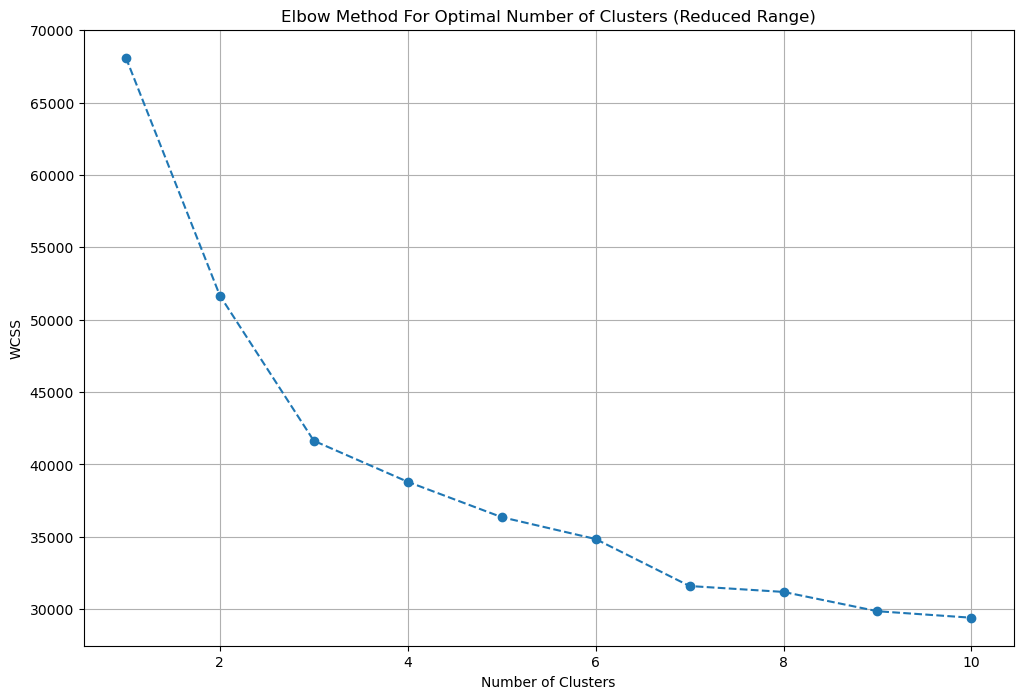

In [642]:
# plot the results 
plt.figure(figsize =(12,8))
plt.plot(range(1,11),wcss_reduced,marker='o',linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [644]:
n_clusters =3
# Fit the Kmeans Model 
kmeans =KMeans(n_clusters=n_clusters ,random_state =42)
kmeans.fit(scaled_data)

#Predict the cluster assignment for each row 
cluster_assignments =kmeans.predict(scaled_data)


In [646]:
df =df.iloc[:,:-18]

In [648]:
df['furnishing_type'] =cluster_assignments

In [650]:
df.sample(5)[['furnishDetails','furnishing_type']]

,furnishDetails,furnishing_type
948,"['1 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
2272,[],0
3318,[],0
306,NaN,0
3402,NaN,0


5.Features


In [653]:
df[['society','features']].sample(5)

,society,features
113,ramprastha city,NaN
3084,Independent,NaN
2488,signature global city 63a,NaN
1155,tulip lemon,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
2261,ansal height 86,NaN


In [655]:
df['features'].isnull().sum()

629

In [667]:
app_df = pd.read_csv('../Data/appartments.csv')

app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [669]:
app_df['PropertyName'] =app_df['PropertyName'].str.lower()

In [671]:
temp_df =df[df['features'].isnull()]

In [673]:
temp_df.shape

(629, 26)

In [675]:
x =temp_df.merge(app_df,left_on='society' ,right_on ='PropertyName' ,how='left')['TopFacilities']

In [677]:
df.loc[temp_df.index,'features'] =x.values

In [679]:
df['features'].isnull().sum()

476

In [681]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast


In [683]:
# Convert the string representation of lists in the features columns to actual list 
df['features_list'] =df['features'].apply(lambda x:ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultilabelBinarizer to convert the features list into a binary matrix 
mlb =MultiLabelBinarizer()
features_binary_matrix =mlb.fit_transform(df['features_list'])

#Convert the binary matrix into a DataFrame 
features_binary_df =pd.DataFrame(features_binary_matrix ,columns =mlb.classes_)

In [685]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2302,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1048,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
1587,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1516,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [687]:
features_binary_df.shape

(3783, 130)

In [689]:
wcss_reduced =[]

for i in range(1,11):
    kmeans =KMeans(n_clusters =i ,init ='k-means++' ,random_state =42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

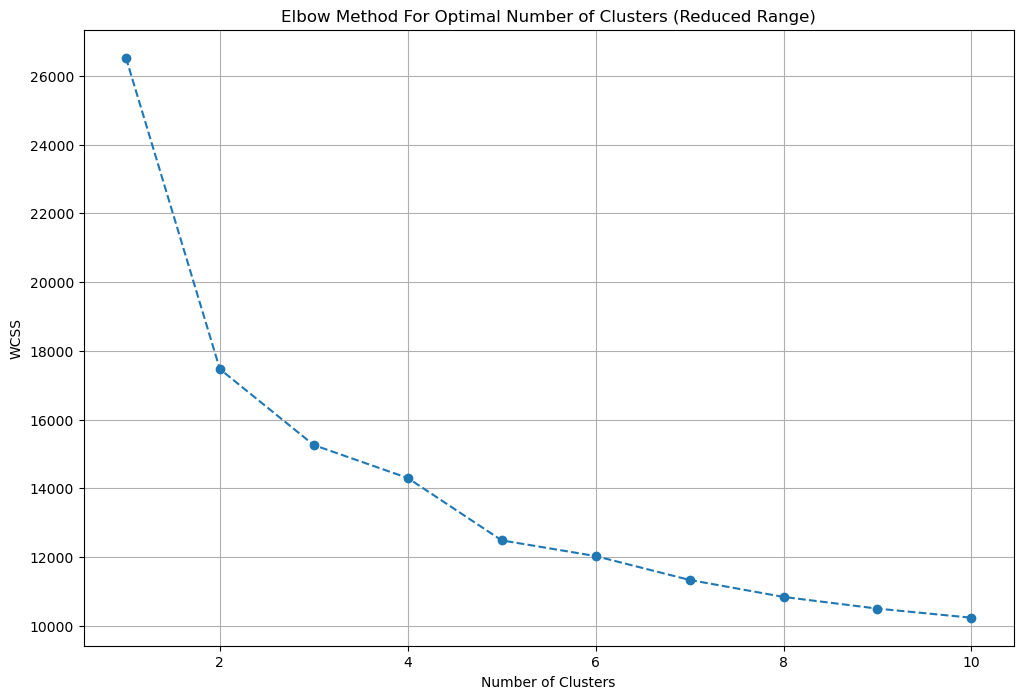

In [691]:

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [693]:
import pandas as pd

# Assuming 'features_binary_df' is already defined as a DataFrame containing binary values for features

# Define the weights for each feature
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}

# Ensure that the DataFrame has the columns that match the keys of the weights
matching_columns = [col for col in weights.keys() if col in features_binary_df.columns]

# Ensure the binary DataFrame matches the weights' columns
luxury_score = features_binary_df[matching_columns].multiply([weights[col] for col in matching_columns]).sum(axis=1)




In [695]:
df['luxury_score'] =luxury_score

In [697]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,Study room,Servant room,Store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,4.0,West,Relatively New,"['Chintapurni Mandir', 'State bank ATM', 'Pearl Dental Clinic', 'Taneja Hospital', 'Dr. Ashok Jain', 'Dr. Madan Clinic', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Dev Man Kathuria Clinic', 'Aryan Hospital', 'Kr Dental Hub', 'Swastik Maternity and Medical Centre', 'Satyam Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Esic Hospital Gurugram', 'Gurgaon Eye Centre', 'Bindal Clinic', 'Shiv Mahima Patient Care Bureau', 'Shree Krishna Hospital Gurgaon', 'M.S Hospital', 'My Care Clinic', 'Ankur Clinic and Maternity Home', 'Triveni Hospital Gurgaon', 'Shri Gobind Hospital', 'Navjeevan Hospital and Maternity Centre', 'Lal Superspeciality Hospital', 'Sparsh Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhatnagar Maternity and Nursing Home', 'Tirath Ram Hospitals Pvt Ltd', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Ajay S. Gupta Clinic', 'Kidney Clinic', 'Mangalam Hospital and Heart Centre Gurgaon', 'Sethi Hospital Gurgaon', 'Shubham Hospital Gurgaon', 'Kharbanda Maternity and Nursing Home', 'Gupta Hospital Gurgaon', 'Dentecare - Multispeciality Dental Clinic', 'State bank of india', 'Hdfc bank', 'Kotak bank', 'Indian bank', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College']","['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Water Storage', 'Visitor Parking']",NaN,NaN,900.0,0,0,0,0,0,0,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Lift(s), Water Storage, Visitor Parking]",28
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,1.0,West,Undefined,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'State bank ATM', 'Sneh Hospital Gurgaon', 'Jiya Clinic', 'Dr. Mittal Clinic', ""Dr. Anurag's Child Care Clinic"", 'Yashroop Medical Centre', 'Dr. Sindhu Clinic', 'Bhardwaj Hospital', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Dr. Hitesh Dawar', 'Prateek Nursing Home And Polyclinic', 'R K Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Kr Dental Hub', 'Gurgaon Eye Centre', 'Shree Krishna Hospital Gurgaon', 'Dr. Ashok Jain', 'GH Gurgaon', 'Aryan Hospital', 'Dr. Agya Ram Sharma Clinic', 'Pearl Dental Clinic', 'D.R. Rajnis Gupta Clinic', 'Sparsh Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Geeta Nursing Home Gurgaon', 'Taneja Hospital', 'Ravi Clinic and Health Care Centre', 'Dr. Sarvejeet Singh', 'Esic Hospital Gurugram', 'Centre For Sight Gurgaon New Railway Road', 'Kidney Clinic', 'Jackson Hospital', 'Jeevan Jyoti Hospital Gurgaon', 'Chiranjiv Hospital', 'Dr. Tomar Clinic', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Lieutenant Atul Kataria School', 'Dronacharya Government College', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Geyser', '3 Light', '1 Curtains', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Maintenance Staff', 'Water Storage', 'Park

In [713]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'Study room', 'Servant room', 'Store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

In [717]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns =['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],axis =1,inplace=True)

KeyError: "['nearbyLocations', 'furnishDetails', 'features', 'features_list', 'additionalRoom'] not found in axis"

In [719]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,Study room,Servant room,Store room,pooja room,others,furnishing_type,luxury_score
3513,house,emaar mgf marbella,sector 66,12.00,37037.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3,3.0,East,Relatively New,NaN,3240.0,NaN,1,1,1,1,0,2,160
3337,house,sare crescent parc royal greens phase 1,sector 92,0.85,4877.0,1743.0,Built Up area: 1743 (161.93 sq.m.),4,4,3,4.0,NotAvailable,Undefined,NaN,1743.0,NaN,0,0,0,0,0,0,0
973,flat,emaar palm gardens,sector 83,1.40,8139.0,1720.1,Super Built up area 1720(159.79 sq.m.)Carpet area: 1095.3 sq.ft. (101.76 sq.m.),3,3,3,2.0,North-West,Relatively New,1720.0,NaN,1095.3,1,1,1,1,0,2,174
2107,flat,orris aster court,sector 85,0.90,5671.0,1587.0,Super Built up area 1587(147.44 sq.m.),3,3,3,8.0,North-East,Relatively New,1587.0,NaN,NaN,0,0,0,0,0,0,49
2456,flat,smart world orchard,sector 61,1.85,14800.0,1250.0,Carpet area: 1250 (116.13 sq.m.),2,2,2,3.0,NaN,New Property,NaN,NaN,1250.0,0,0,0,0,0,0,44


In [721]:
df.shape

(3783, 23)

In [723]:
df.columns


Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'Study room', 'Servant room', 'Store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

In [725]:
columns_to_drop =['Chimney', 'Curtains', 'Fridge', 'Sofa', 'AC', 'Geyser', 'Light', 'TV',
       'Modular Kitchen', 'Exhaust Fan', 'Microwave', 'Washing Machine',
       'Wardrobe', 'Water Purifier', 'Fan', 'Dining Table', 'Bed', 'Stove']

df.drop(columns=columns_to_drop ,inplace =True)


KeyError: "['Chimney', 'Curtains', 'Fridge', 'Sofa', 'AC', 'Geyser', 'Light', 'TV', 'Modular Kitchen', 'Exhaust Fan', 'Microwave', 'Washing Machine', 'Wardrobe', 'Water Purifier', 'Fan', 'Dining Table', 'Bed', 'Stove'] not found in axis"

In [727]:
df.shape

(3783, 23)

In [729]:
df.to_csv('gurgaon_properties_cleaned_v2.csv' ,index =False)